In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 2

print("✅ Libraries imported successfully")

✅ Libraries imported successfully



BUTTERWORTH FILTER ANALYSIS
Butterworth Filter Analysis:
  Cutoff frequency: 250 Hz
  Orders analyzed: [1, 2, 3, 4, 5]


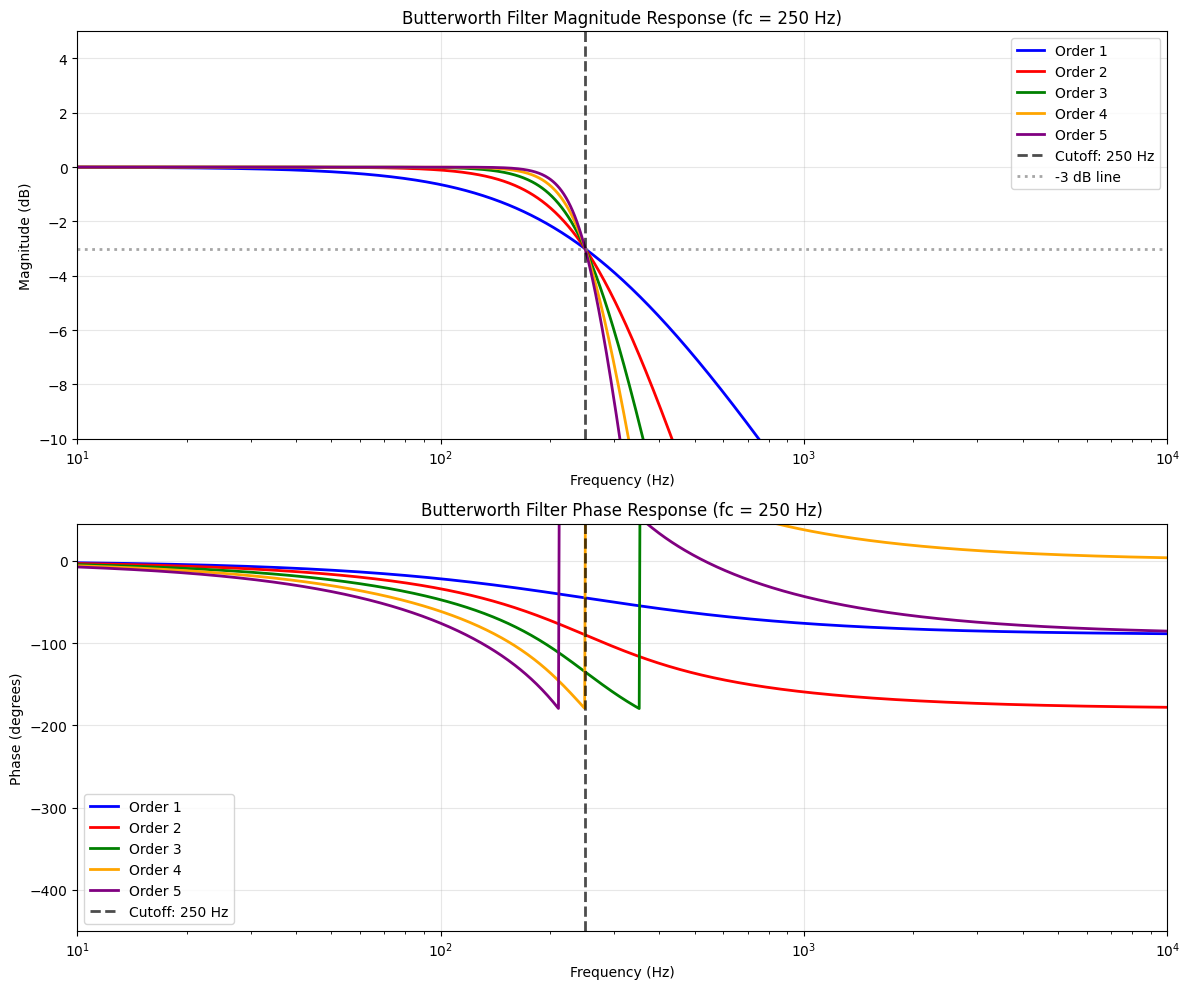

✅ Butterworth filter frequency responses plotted


In [32]:
# =============================================================================
# BUTTERWORTH FILTER FREQUENCY RESPONSE ANALYSIS
# =============================================================================

print(f"\n{'='*70}")
print(f"BUTTERWORTH FILTER ANALYSIS")
print(f"{'='*70}")

# Same filter parameters for comparison
print(f"Butterworth Filter Analysis:")
print(f"  Cutoff frequency: {cutoff_freq} Hz")
print(f"  Orders analyzed: {orders}")

# Create figure for magnitude and phase plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Calculate and plot frequency responses for each order
for i, order in enumerate(orders):
    # Design analog Butterworth filter
    # Note: scipy.signal.butter with analog=True designs analog filters
    b, a = signal.butter(order, 2 * np.pi * cutoff_freq, analog=True)
    
    # Calculate frequency response
    w, h = signal.freqs(b, a, worN=omega)
    
    # Convert to Hz for plotting
    freq_hz = w / (2 * np.pi)
    
    # Magnitude response (in dB)
    magnitude_db = 20 * np.log10(np.abs(h))
    
    # Phase response (in degrees)
    phase_deg = np.angle(h) * 180 / np.pi
    
    # Plot magnitude response
    ax1.semilogx(freq_hz, magnitude_db, color=colors[i], 
                 label=f'Order {order}', linewidth=2)
    
    # Plot phase response
    ax2.semilogx(freq_hz, phase_deg, color=colors[i], 
                 label=f'Order {order}', linewidth=2)

# Format magnitude plot
ax1.axvline(cutoff_freq, color='black', linestyle='--', alpha=0.7, 
           label=f'Cutoff: {cutoff_freq} Hz')
ax1.axhline(-3, color='gray', linestyle=':', alpha=0.7, 
           label='-3 dB line')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Magnitude (dB)')
ax1.set_title(f'Butterworth Filter Magnitude Response (fc = {cutoff_freq} Hz)')
ax1.legend()
ax1.set_xlim([10, 10000])
ax1.set_ylim([-10, 5])

# Format phase plot
ax2.axvline(cutoff_freq, color='black', linestyle='--', alpha=0.7,
           label=f'Cutoff: {cutoff_freq} Hz')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase (degrees)')
ax2.set_title(f'Butterworth Filter Phase Response (fc = {cutoff_freq} Hz)')
ax2.legend()
ax2.set_xlim([10, 10000])
ax2.set_ylim([-450, 45])

plt.tight_layout()
plt.show()

print("✅ Butterworth filter frequency responses plotted")

In [33]:
# =============================================================================
# BUTTERWORTH FILTER CHARACTERISTICS ANALYSIS
# =============================================================================

print(f"\n📊 BUTTERWORTH FILTER CHARACTERISTICS:")
print(f"{'='*60}")

# Analyze key characteristics for each order
print(f"\n{'Order':<6} {'Magnitude at fc (dB)':<20} {'Phase at fc (deg)':<18} {'Group Delay at fc (ms)':<20}")
print(f"{'-'*64}")

for i, order in enumerate(orders):
    # Design filter
    b, a = signal.butter(order, 2 * np.pi * cutoff_freq, analog=True)
    
    # Calculate response at cutoff frequency
    w_cutoff = 2 * np.pi * cutoff_freq
    w, h = signal.freqs(b, a, worN=[w_cutoff])
    
    # Magnitude at cutoff (should be exactly -3 dB for Butterworth filters)
    mag_at_cutoff = 20 * np.log10(np.abs(h[0]))
    
    # Phase at cutoff
    phase_at_cutoff = np.angle(h[0]) * 180 / np.pi
    
    # Calculate group delay at cutoff frequency
    w_group, gd = signal.group_delay((b, a), w=[w_cutoff])
    group_delay_ms = gd[0] * 1000  # Convert to milliseconds
    
    print(f"{order:<6} {mag_at_cutoff:<20.2f} {phase_at_cutoff:<18.1f} {group_delay_ms:<20.3f}")

print(f"\n🔍 KEY OBSERVATIONS:")
print(f"  • Butterworth filters have maximally flat magnitude response in passband")
print(f"  • Magnitude at cutoff is exactly -3 dB for all orders")
print(f"  • Higher orders provide steeper rolloff (20n dB/decade)")
print(f"  • Phase response is non-linear, especially at higher orders")
print(f"  • Group delay varies significantly with frequency")

print(f"\n✅ Butterworth filter analysis completed")


📊 BUTTERWORTH FILTER CHARACTERISTICS:

Order  Magnitude at fc (dB) Phase at fc (deg)  Group Delay at fc (ms)
----------------------------------------------------------------
1      -3.01                -45.0              -999.364            
2      -3.01                -90.0              -1999.100           
3      -3.01                -135.0             -2998.727           
4      -3.01                -180.0             -3998.336           
5      -3.01                135.0              -4997.940           

🔍 KEY OBSERVATIONS:
  • Butterworth filters have maximally flat magnitude response in passband
  • Magnitude at cutoff is exactly -3 dB for all orders
  • Higher orders provide steeper rolloff (20n dB/decade)
  • Phase response is non-linear, especially at higher orders
  • Group delay varies significantly with frequency

✅ Butterworth filter analysis completed


Bessel Filter Order Comparison:
  Filter orders: 2 pole vs 4 pole
  Cutoff frequency: 250 Hz
  Analyzing amplitude points: -0.5dB to -3dB in 0.5dB increments


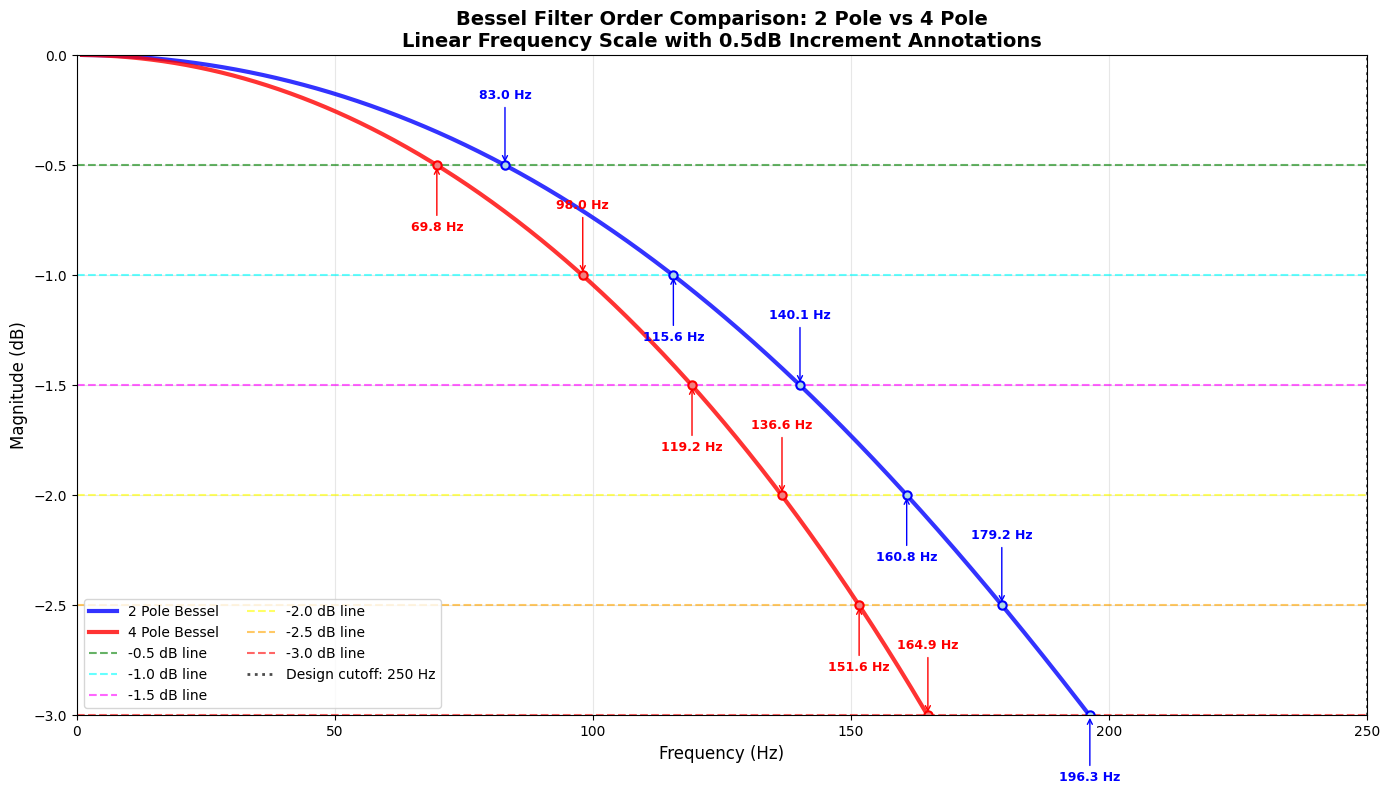


📊 DETAILED FREQUENCY ANALYSIS RESULTS:
Amplitude Level 2 Pole Bessel (Hz) 4 Pole Bessel (Hz) Difference (Hz)
------------------------------------------------------------------------------
    -0.5 dB    83.0               69.8               13.2           
    -1.0 dB    115.6              98.0               17.6           
    -1.5 dB    140.1              119.2              20.9           
    -2.0 dB    160.8              136.6              24.2           
    -2.5 dB    179.2              151.6              27.7           
    -3.0 dB    196.3              164.9              31.4           

🔍 DETAILED COMPARISON:
  At -0.5dB: 2 pole is +13.2 Hz relative to 4 pole
  At -1.0dB: 2 pole is +17.6 Hz relative to 4 pole
  At -1.5dB: 2 pole is +20.9 Hz relative to 4 pole
  At -2.0dB: 2 pole is +24.2 Hz relative to 4 pole
  At -2.5dB: 2 pole is +27.7 Hz relative to 4 pole
  At -3.0dB: 2 pole is +31.4 Hz relative to 4 pole

💡 KEY INSIGHTS:
  • Linear frequency scale shows passband behavior

In [35]:
# =============================================================================
# BESSEL FILTER ORDER COMPARISON WITH AMPLITUDE ANNOTATIONS
# =============================================================================

# Design 2nd and 4th order Bessel filters
order_2 = 2
order_4 = 4
cutoff_freq = 250  # Hz

print(f"Bessel Filter Order Comparison:")
print(f"  Filter orders: {order_2} pole vs {order_4} pole")
print(f"  Cutoff frequency: {cutoff_freq} Hz")
print(f"  Analyzing amplitude points: -0.5dB to -3dB in 0.5dB increments")

# Design both Bessel filters
b_bessel_2, a_bessel_2 = signal.bessel(order_2, 2 * np.pi * cutoff_freq, analog=True)
b_bessel_4, a_bessel_4 = signal.bessel(order_4, 2 * np.pi * cutoff_freq, analog=True)

# Create extended frequency range for better resolution (linear from 0 to 250 Hz)
frequencies_fine = np.linspace(1, 250, 2000)  # 1 Hz to 250 Hz with fine resolution
omega_fine = 2 * np.pi * frequencies_fine

# Calculate frequency responses
w_bessel_2, h_bessel_2 = signal.freqs(b_bessel_2, a_bessel_2, worN=omega_fine)
w_bessel_4, h_bessel_4 = signal.freqs(b_bessel_4, a_bessel_4, worN=omega_fine)

# Convert to Hz and dB
freq_hz = w_bessel_2 / (2 * np.pi)
mag_bessel_2_db = 20 * np.log10(np.abs(h_bessel_2))
mag_bessel_4_db = 20 * np.log10(np.abs(h_bessel_4))

# Find frequencies for specific amplitude levels
def find_frequency_at_db(freq, mag_db, target_db):
    """Find frequency where magnitude crosses target dB level"""
    # Find the index where magnitude crosses the target
    idx = np.where(mag_db <= target_db)[0]
    if len(idx) > 0:
        return freq[idx[0]]
    return None

# Define amplitude levels to analyze
amplitude_levels = [-0.5, -1.0, -1.5, -2.0, -2.5, -3.0]
colors_levels = ['green', 'cyan', 'magenta', 'yellow', 'orange', 'red']

# Find key frequencies for both filters at all amplitude levels
bessel_2_freqs = {}
bessel_4_freqs = {}

for db_level in amplitude_levels:
    bessel_2_freqs[db_level] = find_frequency_at_db(freq_hz, mag_bessel_2_db, db_level)
    bessel_4_freqs[db_level] = find_frequency_at_db(freq_hz, mag_bessel_4_db, db_level)

# Create comparison plot with linear x-axis
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Plot both filter responses
ax.plot(freq_hz, mag_bessel_2_db, 'blue', linewidth=3, 
        label='2 Pole Bessel', alpha=0.8)
ax.plot(freq_hz, mag_bessel_4_db, 'red', linewidth=3, 
        label='4 Pole Bessel', alpha=0.8)

# Add reference lines and annotations for each amplitude level
for i, (db_level, color) in enumerate(zip(amplitude_levels, colors_levels)):
    # Add horizontal reference line
    ax.axhline(db_level, color=color, linestyle='--', alpha=0.6, linewidth=1.5, 
              label=f'{db_level} dB line')
    
    # Annotate 2 pole Bessel frequency
    bessel_2_freq = bessel_2_freqs[db_level]
    if bessel_2_freq:
        ax.plot(bessel_2_freq, db_level, 'bo', markersize=6, markerfacecolor='lightblue', 
               markeredgecolor='blue', markeredgewidth=1.5)
        # Alternate annotation positions to avoid overlap
        y_offset = 0.3 if i % 2 == 0 else -0.3
        ax.annotate(f'{bessel_2_freq:.1f} Hz', 
                   xy=(bessel_2_freq, db_level), 
                   xytext=(bessel_2_freq, db_level + y_offset),
                   arrowprops=dict(arrowstyle='->', color='blue', lw=1),
                   fontsize=9, ha='center', color='blue', weight='bold')
    
    # Annotate 4 pole Bessel frequency
    bessel_4_freq = bessel_4_freqs[db_level]
    if bessel_4_freq:
        ax.plot(bessel_4_freq, db_level, 'ro', markersize=6, markerfacecolor='lightcoral', 
               markeredgecolor='red', markeredgewidth=1.5)
        # Alternate annotation positions to avoid overlap
        y_offset = 0.3 if i % 2 == 1 else -0.3
        ax.annotate(f'{bessel_4_freq:.1f} Hz', 
                   xy=(bessel_4_freq, db_level), 
                   xytext=(bessel_4_freq, db_level + y_offset),
                   arrowprops=dict(arrowstyle='->', color='red', lw=1),
                   fontsize=9, ha='center', color='red', weight='bold')

# Add design cutoff reference
ax.axvline(cutoff_freq, color='black', linestyle=':', alpha=0.7, linewidth=2,
          label=f'Design cutoff: {cutoff_freq} Hz')

# Format plot
ax.grid(True, alpha=0.3)
ax.set_xlabel('Frequency (Hz)', fontsize=12)
ax.set_ylabel('Magnitude (dB)', fontsize=12)
ax.set_title('Bessel Filter Order Comparison: 2 Pole vs 4 Pole\nLinear Frequency Scale with 0.5dB Increment Annotations', 
            fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='lower left', ncol=2)
ax.set_xlim([0, 250])
ax.set_ylim([-3, 0])

plt.tight_layout()
plt.show()

# Print numerical results
print(f"\n📊 DETAILED FREQUENCY ANALYSIS RESULTS:")
print(f"{'='*80}")
print(f"{'Amplitude Level':<15} {'2 Pole Bessel (Hz)':<18} {'4 Pole Bessel (Hz)':<18} {'Difference (Hz)':<15}")
print(f"{'-'*78}")

for db_level in amplitude_levels:
    bessel_2_freq = bessel_2_freqs[db_level]
    bessel_4_freq = bessel_4_freqs[db_level]
    
    if bessel_2_freq and bessel_4_freq:
        diff = bessel_2_freq - bessel_4_freq
        print(f"{db_level:>8.1f} dB    {bessel_2_freq:<18.1f} {bessel_4_freq:<18.1f} {diff:<15.1f}")
    elif bessel_2_freq:
        print(f"{db_level:>8.1f} dB    {bessel_2_freq:<18.1f} {'N/A':<18} {'N/A':<15}")
    elif bessel_4_freq:
        print(f"{db_level:>8.1f} dB    {'N/A':<18} {bessel_4_freq:<18.1f} {'N/A':<15}")
    else:
        print(f"{db_level:>8.1f} dB    {'N/A':<18} {'N/A':<18} {'N/A':<15}")

print(f"\n🔍 DETAILED COMPARISON:")
for db_level in amplitude_levels:
    bessel_2_freq = bessel_2_freqs[db_level]
    bessel_4_freq = bessel_4_freqs[db_level]
    if bessel_2_freq and bessel_4_freq:
        diff = bessel_2_freq - bessel_4_freq
        print(f"  At {db_level}dB: 2 pole is {diff:+.1f} Hz relative to 4 pole")

print(f"\n💡 KEY INSIGHTS:")
print(f"  • Linear frequency scale shows passband behavior clearly")
print(f"  • 4 pole Bessel provides steeper rolloff than 2 pole")
print(f"  • Both maintain excellent group delay characteristics")
print(f"  • Higher order reduces passband ripple but increases complexity")
print(f"  • Rolloff rate difference: 4 pole = 80 dB/decade vs 2 pole = 40 dB/decade")

print(f"\n✅ Bessel filter order comparison completed")